/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(100, 100)

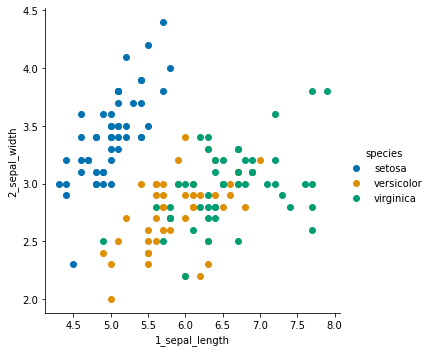

In [12]:
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors

iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=5, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax

Y.shape

In [24]:
count = 0

for xx, yy in zip(np.ravel(X), np.ravel(Y)):
  count += 1

count

print(np.ravel(X).shape)

(10000,)


In [19]:
#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict([[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

X.shape

# print(zz.shape)

(100, 100)

In [14]:
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

print(Z.shape)
print(Z)

(100, 100)
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


In [ ]:
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()
